In [1]:
import pandas as pd
import numpy as np
import sys
sys.path.append('../')

import matplotlib.pyplot as plt
import core.config as conf

In [2]:
cus_df = pd.read_csv(conf.data_path + 'cus_info.csv')

In [3]:
cus_df.head()

,act_id,sex_dit_cd,cus_age_stn_cd,ivs_icn_cd,cus_aet_stn_cd,mrz_pdt_tp_sgm_cd,lsg_sgm_cd,tco_cus_grd_cd,tot_ivs_te_sgm_cd,mrz_btp_dit_cd
0,64aae8dd71e5c0761000db9f9a6779e504e7a4aa9dc097...,1,4,99,1,2,3,3,6,16
1,5f7c3a8f37d9c268d06130ff0be5d32a1b9ef68c13049f...,1,6,4,4,2,5,2,6,1
2,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,2,7,4,3,2,5,5,6,9
3,6d497facfa1ea5901b827335553331f8555fec02a8184f...,2,6,4,4,8,5,3,6,16
4,b727c78d2cfc246c97b677f29a034399a0c7e7873fff44...,1,5,2,2,2,5,5,5,16


## 성별 및 연령구간 데이터 분포 분석

- sex_dit_cd : 성별 ( 1 : 남성, 2 : 여성)
- cus_age_stn_cd : 연령  

#### 성별

In [4]:
cus_df['sex_dit_cd'].value_counts()

1    5985
2    4015
Name: sex_dit_cd, dtype: int64

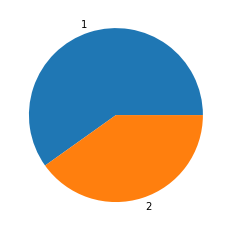

In [5]:
plt.pie(cus_df['sex_dit_cd'].value_counts(), labels = cus_df['sex_dit_cd'].value_counts().keys())
plt.show()

#### 연령

In [6]:
cus_age = cus_df.groupby('cus_age_stn_cd').cus_age_stn_cd.sum()
label = cus_age.keys()

In [7]:
cus_age

cus_age_stn_cd
1     481
2    2756
3    4572
4    6268
5    6845
6    8490
7    7686
8    6296
9    3429
Name: cus_age_stn_cd, dtype: int64

In [8]:
index = np.arange(len(label))

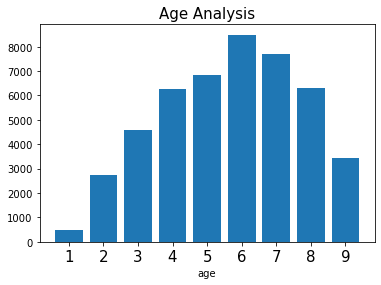

In [9]:
plt.bar(index, cus_age)
plt.title('Age Analysis', fontsize=15)
plt.xlabel('age', fontsize=10)
plt.xticks(index, label, fontsize=15)
plt.show()

01 : 20세 ~ 25세미만  
02 : 25세 ~ 30세미만  
03 : 30세 ~ 35세미만  
04 : 35세 ~ 40세미만  
05 : 40세 ~ 45세미만  
06 : 45세 ~ 50세미만  
07 : 50세 ~ 55세미만  
08 : 55세 ~ 60세미만  
09 : 60세 ~ 65세미만  

## 성별과 연령 관계 분석

In [10]:
male_age = cus_df[cus_df['sex_dit_cd'] == 1]['cus_age_stn_cd']

In [11]:
female_age = cus_df[cus_df['sex_dit_cd'] == 2]['cus_age_stn_cd']

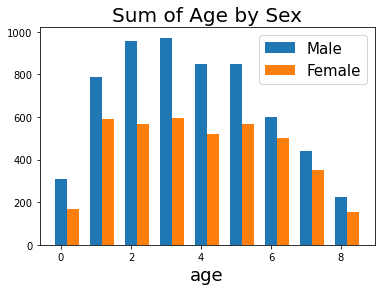

In [12]:
bar_width = 0.35
p1 = plt.bar(index, male_age.value_counts().sort_index(), 
             bar_width, 
             label='Male')

p2 = plt.bar(index + bar_width, female_age.value_counts().sort_index(), 
             bar_width, 
             label='Female')



plt.title('Sum of Age by Sex', fontsize=20)
plt.xlabel('age', fontsize=18)
plt.legend((p1[0], p2[0]), ('Male', 'Female'), fontsize=15)
plt.show()

## 투자성향 분포

01: 안정형  
02: 안정추구형  
03: 위험중립형  
04: 적극투자형  
05: 공격투자형  
09: 전문투자가형  
00: 정보제공미동의  
99: 미정의 

In [13]:
ivs = cus_df['ivs_icn_cd'].value_counts().sort_index()
label = ivs.keys()

In [14]:
index = np.arange(len(label))

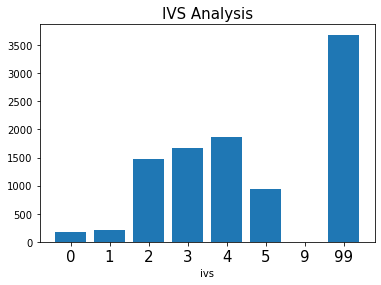

In [15]:
plt.bar(index, ivs)
plt.title('IVS Analysis', fontsize=15)
plt.xlabel('ivs', fontsize=10)
plt.xticks(index, label, fontsize=15)
plt.show()

## 고객자산구간 분포

01: 0원이상-1천만원미만  
02: 1천만원이상-3천만원미만  
03: 3천만원이상-5천만원미만  
04: 5천만원이상-1억원미만  
05: 1억원이상-3억원미만  
06: 3억원이상  

In [16]:
aet = cus_df['cus_aet_stn_cd'].value_counts().sort_index()
label = aet.keys()
index = np.arange(len(label))

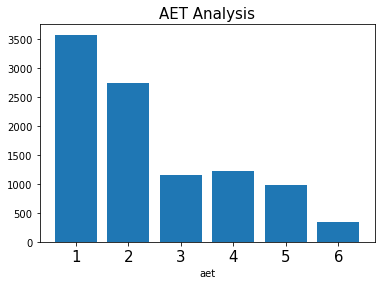

In [17]:
plt.bar(index, aet)
plt.title('AET Analysis', fontsize=15)
plt.xlabel('aet', fontsize=10)
plt.xticks(index, label, fontsize=15)
plt.show()

## 주거래 상품군 분석
01: Only CMA  
02: 국내주식  
03: 해외주식  
04: 선물옵션  
05: 금속  
06: 국내채권  
07: 해외채권  
08: 펀드  
09: ELS/DLS  
10: 신탁_퇴직연금  
11: RP  
12: 발행어음  
14: WRAP  
15: 신용대출  
99: 미정의  

In [18]:
mrz = cus_df['mrz_pdt_tp_sgm_cd'].value_counts().sort_index()
label = mrz.keys()
index = np.arange(len(label))

In [19]:
mrz

1       34
2     9659
3      261
5        7
6        3
8        8
9        5
10       9
11       3
12       1
15      10
Name: mrz_pdt_tp_sgm_cd, dtype: int64

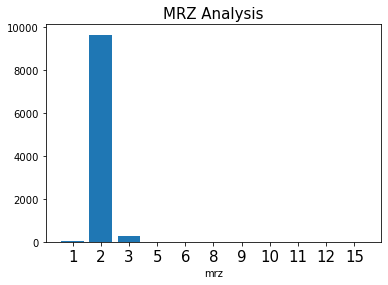

In [20]:
plt.bar(index, mrz)
plt.title('MRZ Analysis', fontsize=15)
plt.xlabel('mrz', fontsize=10)
plt.xticks(index, label, fontsize=15)
plt.show()

## 고객 Life Stage 분석
02: 사회초년생 (20-29세)  
03: 가족형성기_남자 (30-39세 & 남자)  
04: 가족형성기_여자 (30-39세 & 여자)  
05: 가족성숙기_직장인 (40-59세 & 직장인 & 남자)  
06: 가족성숙기_주부 (40-59세 & 주부 & 여자 )  
07: 가족성숙기_남자 (40-59세 & 기타 & 남자 )  
08: 가족성숙기_여자 (40-59세 & 기타 & 여자)  
09: 은퇴기 (60-69세)

In [21]:
lsg = cus_df['lsg_sgm_cd'].value_counts().sort_index()
label = lsg.keys()
index = np.arange(len(label))

In [22]:
lsg

2    1860
3    1926
4    1164
5    2593
6     851
7     827
8     400
9     379
Name: lsg_sgm_cd, dtype: int64

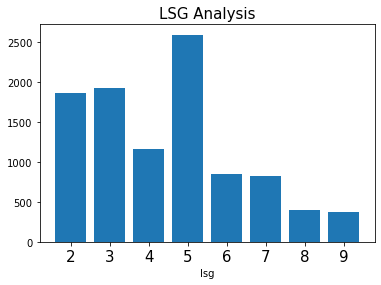

In [23]:
plt.bar(index, lsg)
plt.title('LSG Analysis', fontsize=15)
plt.xlabel('lsg', fontsize=10)
plt.xticks(index, label, fontsize=15)
plt.show()

## 고객 등급 분석
01: 탑클래스 (자산1)10억이상 or 수익기여도2) 5백만원 이상)  
02: 골드 (자산3억이상 or 수익기여도 3백만원 이상)  
03: 로얄 (자산1억이상 or 수익기여도 1백만원 이상)  
04: 그린 (자산3천이상 or 수익기여도 5십만원 이상)  
05: 블루 (자산1천이상 or 수익기여도 1십만원 이상)  
09: 등급 미정의  
99: 미정의 (결측치)  

In [24]:
tco = cus_df['tco_cus_grd_cd'].value_counts().sort_index()
label = tco.keys()
index = np.arange(len(label))

In [25]:
tco

1       83
2      345
3     1184
4     2298
5     2687
9     3366
99      37
Name: tco_cus_grd_cd, dtype: int64

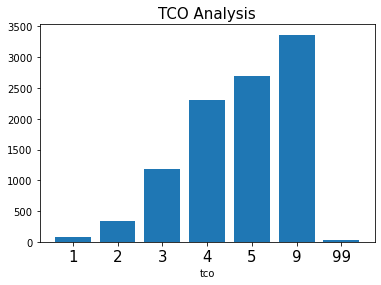

In [26]:
plt.bar(index, tco)
plt.title('TCO Analysis', fontsize=15)
plt.xlabel('tco', fontsize=10)
plt.xticks(index, label, fontsize=15)
plt.show()

## 총 투자기간 분석
계좌를 개설한 이래 고객이 100만원 이상 보유한 개월 수  
01: 6개월 미만  
02: 6개월-1년 미만  
03: 1년-3년 미만  
04: 3년-5년 미만  
05: 5년-10년 미만  
06: 10년 이상  

In [27]:
tot = cus_df['tot_ivs_te_sgm_cd'].value_counts().sort_index()
label = tot.keys()
index = np.arange(len(label))

In [28]:
tot

1     962
2    3315
3    4271
4     992
5     312
6     148
Name: tot_ivs_te_sgm_cd, dtype: int64

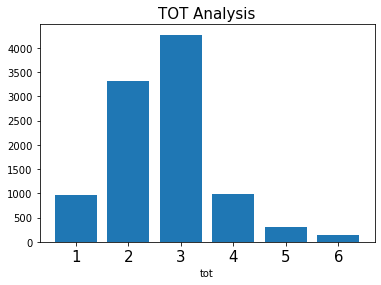

In [29]:
plt.bar(index, tot)
plt.title('TOT Analysis', fontsize=15)
plt.xlabel('tot', fontsize=10)
plt.xticks(index, label, fontsize=15)
plt.show()

## 주거래 업종 분석
해당월 거래 금액이 가장 큰 업종 구분   
01: 건설업  
02: 금융업  
03: 기계  
04: 방송/통신  
05: 서비스/오락/문화  
06: 운송/운수  
07: 유통  
08: 의료/의약  
09: 전기/전자  
10: 제조  
11: 철강  
12: 화학  
13: IT  
14: 기타  
15: 혼합  
16: 비매매  

In [30]:
mrz_btp = cus_df['mrz_btp_dit_cd'].value_counts().sort_index()
label = mrz_btp.keys()
index = np.arange(len(label))

In [31]:
mrz_btp

1       75
2      322
3       79
4       46
5      831
6      488
7      324
8      550
9     1320
10    2107
11      83
12     325
13     867
14     496
15      63
16    2024
Name: mrz_btp_dit_cd, dtype: int64

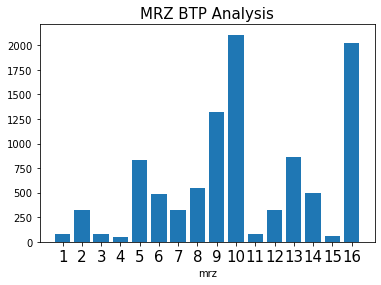

In [32]:
plt.bar(index, mrz_btp)
plt.title('MRZ BTP Analysis', fontsize=15)
plt.xlabel('mrz', fontsize=10)
plt.xticks(index, label, fontsize=15)
plt.show()

제조부문 종목?

## 주식 보유기간 & 고객 정보 연관 분석

In [33]:
stk_df = pd.read_csv(conf.data_path + 'stk_hld_train.csv')

In [38]:
df = pd.merge(left = stk_df, right = cus_df, how = "left", on = "act_id")

In [46]:
df.head()

,act_id,iem_cd,byn_dt,hold_d,sex_dit_cd,cus_age_stn_cd,ivs_icn_cd,cus_aet_stn_cd,mrz_pdt_tp_sgm_cd,lsg_sgm_cd,tco_cus_grd_cd,tot_ivs_te_sgm_cd,mrz_btp_dit_cd
0,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A006360,20180726,11,1,9,3,2,2,9,5,5,8
1,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A005930,20180131,80,1,9,3,2,2,9,5,5,8
2,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A005070,20180517,5,1,9,3,2,2,9,5,5,8
3,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A003520,20201112,22,1,9,3,2,2,9,5,5,8
4,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A002310,20180905,324,1,9,3,2,2,9,5,5,8


### 주식 보유기간(label) 분석

In [42]:
hold = df['hold_d'].value_counts().sort_index()
label = hold.keys()
index = np.arange(len(label))

In [45]:
hold

1       190008
2        83359
3        52303
4        38318
5        29640
         ...  
1062         1
1131         1
1140         1
1173         1
1184         1
Name: hold_d, Length: 774, dtype: int64

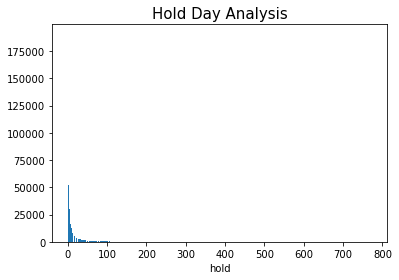

In [44]:
plt.bar(index, hold)
plt.title('Hold Day Analysis', fontsize=15)
plt.xlabel('hold', fontsize=10)
plt.show()

In [68]:
cumsum = 0
for idx, value in enumerate(hold) :
    cumsum += idx * value
print("mean : ", cumsum / hold.sum())

mean :  18.584065082644628


### 연령 구간에 따른 주식 보유 기간

In [51]:
hold_age = df['hold_d'].groupby(df['cus_age_stn_cd']).mean()

In [52]:
hold_age

cus_age_stn_cd
1    15.285900
2    17.148652
3    20.588914
4    20.279309
5    23.083953
6    21.952967
7    16.902997
8    18.099228
9    14.993685
Name: hold_d, dtype: float64

In [53]:
label = hold_age.keys()
index = np.arange(len(label))

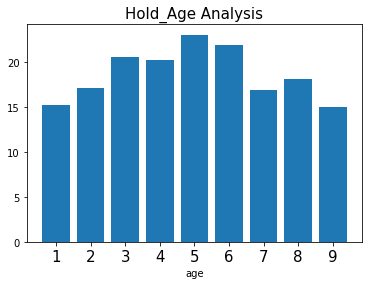

In [56]:
plt.bar(index, hold_age)
plt.title('Hold_Age Analysis', fontsize=15)
plt.xlabel('age', fontsize=10)
plt.xticks(index, label, fontsize=15)
plt.show()

### 투자성향에 따른 주식 보유기간 분석

In [57]:
hold_ivs = df['hold_d'].groupby(df['ivs_icn_cd']).mean()

In [58]:
hold_ivs

ivs_icn_cd
0     22.516752
1     12.944112
2     16.454892
3     17.103244
4     19.741460
5     22.818877
9     29.513699
99    22.361541
Name: hold_d, dtype: float64

In [59]:
label = hold_ivs.keys()
index = np.arange(len(label))

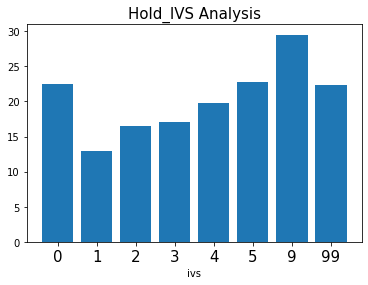

In [60]:
plt.bar(index, hold_ivs)
plt.title('Hold_IVS Analysis', fontsize=15)
plt.xlabel('ivs', fontsize=10)
plt.xticks(index, label, fontsize=15)
plt.show()

01: 안정형  
02: 안정추구형  
03: 위험중립형  
04: 적극투자형  
05: 공격투자형  
09: 전문투자가형  
00: 정보제공미동의  
99: 미정의  

**-> 안정형일수록 주식 보유기간이 낮음**

### 고객자산구간에 따른 주식 보유기간 분석 

In [61]:
hold_aet = df['hold_d'].groupby(df['cus_aet_stn_cd']).mean()

In [62]:
hold_aet

cus_aet_stn_cd
1    16.443982
2    18.715247
3    17.975862
4    19.885230
5    25.948949
6    25.704958
Name: hold_d, dtype: float64

In [63]:
label = hold_aet.keys()
index = np.arange(len(label))

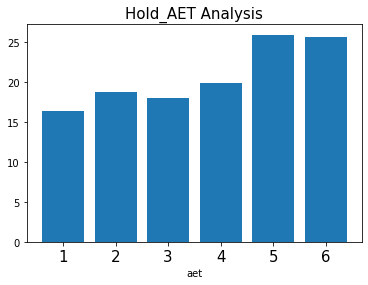

In [64]:
plt.bar(index, hold_aet)
plt.title('Hold_AET Analysis', fontsize=15)
plt.xlabel('aet', fontsize=10)
plt.xticks(index, label, fontsize=15)
plt.show()

01: 0원이상-1천만원미만  
02: 1천만원이상-3천만원미만  
03: 3천만원이상-5천만원미만  
04: 5천만원이상-1억원미만  
05: 1억원이상-3억원미만  
06: 3억원이상 

**-> 자산이 많을수록 보유 기간 길어짐**

### Life Stage에 따른 주식 보유기간 분석

In [69]:
hold_lsg = df['hold_d'].groupby(df['lsg_sgm_cd']).mean()

In [70]:
hold_lsg

lsg_sgm_cd
2    16.782481
3    18.757898
4    24.000614
5    20.917437
6    19.536418
7    19.848741
8    18.276048
9    14.987741
Name: hold_d, dtype: float64

In [72]:
label = hold_lsg.keys()
index = np.arange(len(label))

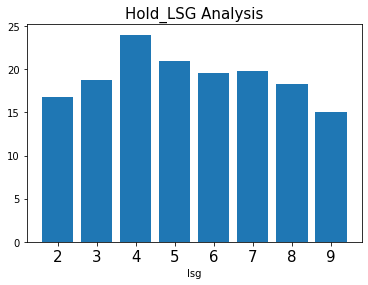

In [73]:
plt.bar(index, hold_lsg)
plt.title('Hold_LSG Analysis', fontsize=15)
plt.xlabel('lsg', fontsize=10)
plt.xticks(index, label, fontsize=15)
plt.show()

02: 사회초년생 (20-29세)  
03: 가족형성기_남자 (30-39세 & 남자)  
04: 가족형성기_여자 (30-39세 & 여자)  
05: 가족성숙기_직장인 (40-59세 & 직장인 & 남자)  
06: 가족성숙기_주부 (40-59세 & 주부 & 여자 )  
07: 가족성숙기_남자 (40-59세 & 기타 & 남자 )  
08: 가족성숙기_여자 (40-59세 & 기타 & 여자)  
09: 은퇴기 (60-69세)  

### lifestage와 투자성향 관계 분석
-> 주식 보유 기간이 가장 긴 04(가족형성기 여자 (30~39세 & 여자)의 경우 05 공격투자형을 보이는 경우가 큰 것을 확인 가능)

<AxesSubplot:xlabel='ivs_icn_cd'>

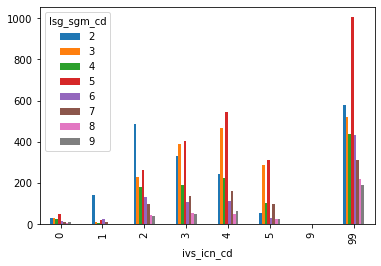

In [94]:
pd.crosstab(cus_df['ivs_icn_cd'],cus_df['lsg_sgm_cd']).plot.bar()

### 고객 등급에 따른 주식 보유기간 분석

In [96]:
hold_tco = df['hold_d'].groupby(df['tco_cus_grd_cd']).mean()

In [97]:
hold_tco

tco_cus_grd_cd
1     21.298104
2     25.237621
3     22.141544
4     19.228788
5     17.702088
9     18.814454
99     6.010101
Name: hold_d, dtype: float64

In [98]:
label = hold_tco.keys()
index = np.arange(len(label))

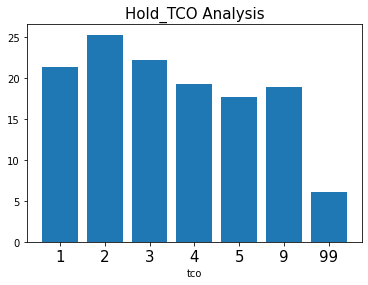

In [99]:
plt.bar(index, hold_tco)
plt.title('Hold_TCO Analysis', fontsize=15)
plt.xlabel('tco', fontsize=10)
plt.xticks(index, label, fontsize=15)
plt.show()

01: 탑클래스 (자산1)10억이상 or 수익기여도2) 5백만원 이상)  
02: 골드 (자산3억이상 or 수익기여도 3백만원 이상)  
03: 로얄 (자산1억이상 or 수익기여도 1백만원 이상)  
04: 그린 (자산3천이상 or 수익기여도 5십만원 이상)  
05: 블루 (자산1천이상 or 수익기여도 1십만원 이상)  
09: 등급 미정의  
99: 미정의 (결측치)  

### 총 투자기간에 따른 주식 보유 기간 분석

In [100]:
hold_tot = df['hold_d'].groupby(df['tot_ivs_te_sgm_cd']).mean()

In [101]:
hold_tot

tot_ivs_te_sgm_cd
1    12.310893
2    12.556034
3    20.111816
4    26.488120
5    23.119426
6    21.441604
Name: hold_d, dtype: float64

In [104]:
label = hold_tot.keys()
index = np.arange(len(label))

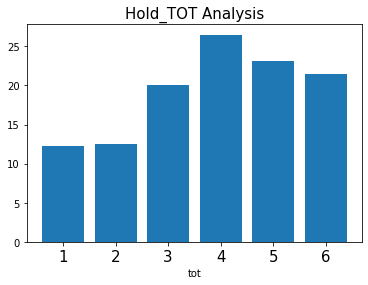

In [105]:
plt.bar(index, hold_tot)
plt.title('Hold_TOT Analysis', fontsize=15)
plt.xlabel('tot', fontsize=10)
plt.xticks(index, label, fontsize=15)
plt.show()

계좌를 개설한 이래 고객이 100만원 이상 보유한 개월 수  
01: 6개월 미만  
02: 6개월-1년 미만  
03: 1년-3년 미만  
04: 3년-5년 미만  
05: 5년-10년 미만  
06: 10년 이상  

#### 연령 별 총 투자기간 분석
투자 기간이 길다는 뜻은 (예를 들면 10년 이상) 연령대가 그만큼 높을 수 있다고 볼 수도 있어 보유 개월 수가 어느 정도 이상 증가하면 투자 기간이 줄어드는 이유가 연령대인가 하여 분석해보았으나 딱히 그렇지도 않은 듯

<AxesSubplot:xlabel='cus_age_stn_cd'>

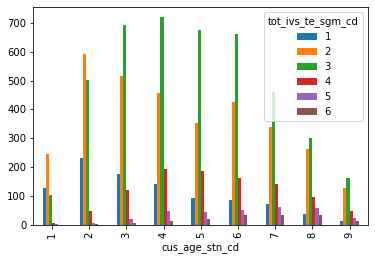

In [106]:
pd.crosstab(cus_df['cus_age_stn_cd'],cus_df['tot_ivs_te_sgm_cd']).plot.bar()

### 주거래 업종 부문에 따른 주식 보유 기간 분석

In [107]:
hold_mrz_btp = df['hold_d'].groupby(df['mrz_btp_dit_cd']).mean()

In [108]:
hold_mrz_btp

mrz_btp_dit_cd
1     24.758744
2     22.087984
3     20.663376
4     19.087474
5     20.685079
6     20.333439
7     21.868174
8     19.437650
9     23.432756
10    14.818892
11    25.680756
12    20.994593
13    20.362778
14    23.239887
15    18.620184
16    38.934054
Name: hold_d, dtype: float64

In [109]:
label = hold_mrz_btp.keys()
index = np.arange(len(label))

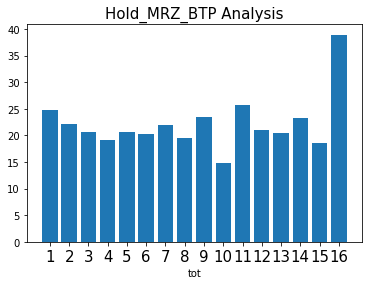

In [110]:
plt.bar(index, hold_mrz_btp)
plt.title('Hold_MRZ_BTP Analysis', fontsize=15)
plt.xlabel('tot', fontsize=10)
plt.xticks(index, label, fontsize=15)
plt.show()

해당월 거래 금액이 가장 큰 업종 구분   
01: 건설업  
02: 금융업  
03: 기계  
04: 방송/통신  
05: 서비스/오락/문화  
06: 운송/운수  
07: 유통  
08: 의료/의약  
09: 전기/전자  
10: 제조  
11: 철강  
12: 화학  
13: IT  
14: 기타  
15: 혼합  
16: 비매매  

**-> 위에서 분석한 것을 보면 제조 부분이 주거래 업종인 경우가 압도적으로 많았으나 반대로 주식 보유 기간은 압도적으로 제조 부분이 적음**